<a href="https://colab.research.google.com/github/joaoeliandro/microdata_enem_analysis/blob/main/analise_microdados_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Microdados do ENEM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib

In [3]:
microdatasEnem = pd.read_csv("drive/MyDrive/analise_dados/brutos/microdados_enem_2020/DADOS/MICRODADOS_ENEM_2020.csv", sep=";", encoding="ISO-8859-1")

In [ ]:
microdatasEnem.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B
5,200003132410,2020,3,F,1,3,1,1,1,1,...,B,A,A,B,B,A,D,A,B,B
6,200001379770,2020,9,M,1,3,1,1,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,200001334237,2020,4,M,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,200006762554,2020,5,F,2,3,1,1,3,1,...,A,A,A,B,A,A,C,A,A,A
9,200005146210,2020,2,M,1,2,1,2,0,2,...,A,A,A,B,A,A,A,A,A,B


In [ ]:
microdatasEnem

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783104,200003396891,2020,2,F,1,1,1,2,0,2,...,B,A,A,B,A,A,D,A,B,B
5783105,200006040822,2020,3,M,1,1,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5783106,200004928656,2020,3,F,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5783107,200006774808,2020,4,F,1,1,1,2,0,3,...,B,B,B,D,B,B,E,A,D,B


In [ ]:
microdatasEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

Separating important columns

In [ ]:
columnsSelectedEnem = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']

Filtering the selected microdatas

In [ ]:
microdatasEnemSelected = microdatasEnem.filter(items=columnsSelectedEnem)

In [ ]:
microdatasEnemSelected.head(10)

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,11,F,1,2,1,1,11,1,NaN,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,M,2,3,1,1,11,1,NaN,0,...,595.3,711.3,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0
2,4,F,2,3,2,2,0,2,1.0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,M,1,3,1,2,0,2,1.0,0,...,624.2,759.4,0,1.0,140.0,200.0,140.0,120.0,160.0,760.0
4,4,F,1,3,2,1,1,1,NaN,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,F,1,3,1,1,1,1,NaN,0,...,505.4,526.7,1,1.0,140.0,120.0,140.0,140.0,160.0,700.0
6,9,M,1,3,1,1,6,1,NaN,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,M,1,1,1,1,1,1,NaN,0,...,562.1,753.2,0,1.0,140.0,120.0,120.0,120.0,100.0,600.0
8,5,F,2,3,1,1,3,1,NaN,0,...,486.2,448.5,1,1.0,120.0,120.0,120.0,140.0,100.0,600.0
9,2,M,1,2,1,2,0,2,1.0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting NO_MUNICIPIO_PROVA (test city) column

In [ ]:
column_no_municipio_prova = microdatasEnemSelected['NO_MUNICIPIO_PROVA']

In [ ]:
column_no_municipio_prova

0                        Belém
1                        Natal
2                     Salvador
3          Santana de Parnaíba
4                   Diamantina
                  ...         
5783104                Crateús
5783105            Três Lagoas
5783106                 Piraju
5783107                 Cuiabá
5783108               São Luís
Name: NO_MUNICIPIO_PROVA, Length: 5783109, dtype: object

Sorting and counting the test cities

In [ ]:
column_no_municipio_prova.value_counts().sort_index()

Abaetetuba               8233
Abaeté                   1140
Abreu e Lima             3644
Acarape                   714
Acaraú                   1536
                         ... 
Água Preta                580
Águas Belas              1538
Águas Formosas            680
Águas Lindas de Goiás    5391
Óbidos                   1526
Name: NO_MUNICIPIO_PROVA, Length: 1712, dtype: int64

Getting TP_FAIXA_ETARIA (age) column

In [ ]:
column_tp_faixa_etaria = microdatasEnemSelected['TP_FAIXA_ETARIA']

In [ ]:
column_tp_faixa_etaria

0          11
1          11
2           4
3           2
4           4
           ..
5783104     2
5783105     3
5783106     3
5783107     4
5783108     2
Name: TP_FAIXA_ETARIA, Length: 5783109, dtype: int64

Sorting and counting the age group

In [ ]:
column_tp_faixa_etaria.value_counts().sort_index()

1     336805
2     775404
3     887715
4     609450
5     459606
6     353734
7     274709
8     239812
9     204689
10    177344
11    575442
12    341808
13    235027
14    143795
15     86079
16     47539
17     22383
18      8144
19      2693
20       931
Name: TP_FAIXA_ETARIA, dtype: int64

Creating the age group histogram

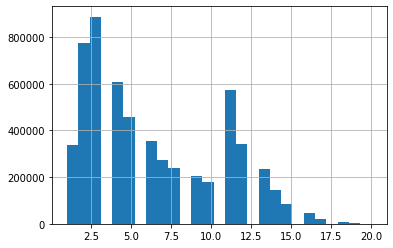

In [ ]:
column_tp_faixa_etaria.hist(bins=27)

Getting SG_UF_PROVA (test state) column

In [ ]:
column_sg_uf_prova = microdatasEnemSelected['SG_UF_PROVA']

In [ ]:
column_sg_uf_prova.value_counts()

SP    910492
MG    577211
BA    447691
RJ    387480
PA    330883
CE    325680
PE    315569
RS    249130
PR    239635
MA    238272
GO    211069
PB    164965
AM    163426
PI    134678
RN    131225
SC    121153
DF    116932
ES    105812
AL    102551
MT    101727
SE     88205
MS     84548
RO     69594
TO     59209
AP     47263
AC     41824
RR     16885
Name: SG_UF_PROVA, dtype: int64

Creating the test state histogram

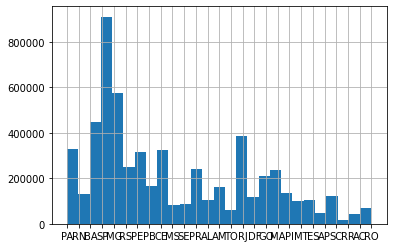

In [ ]:
column_sg_uf_prova.hist(bins=27)

Getting TP_COR_RACA (color/race) column

In [ ]:
column_tp_cor_raca = microdatasEnemSelected['TP_COR_RACA']

Distributing the values for race

In [ ]:
dist_tp_cor_raca = column_tp_cor_raca.value_counts()

Color/Race category: 


*   0 -> not declared
*   1 -> white
*   2 -> black
*   3 -> brown
*   4 -> yellow
*   5 -> indigenous



In [ ]:
dist_tp_cor_raca

3    2720485
1    2007633
2     771740
4     128522
0     116883
5      37846
Name: TP_COR_RACA, dtype: int64

Percentage calculation of each race

In [ ]:
percent_tp_cor_raca = [100*x/dist_tp_cor_raca.sum() for x in dist_tp_cor_raca]

In [ ]:
percent_tp_cor_raca

[47.041911193442836,
 34.715461873535496,
 13.344725129683704,
 2.2223686255956787,
 2.0211100983917127,
 0.6544230793505708]

Getting TP_SEXO (sex) column

In [ ]:
column_tp_sexo = microdatasEnemSelected['TP_SEXO']

Distributing the values for sex

In [ ]:
dist_tp_sexo = column_tp_sexo.value_counts()

In [ ]:
dist_tp_sexo

F    3468805
M    2314304
Name: TP_SEXO, dtype: int64

Percentage calculation of each sex

In [ ]:
percent_tp_sexo = [100*x/dist_tp_sexo.sum() for x in dist_tp_sexo]

In [ ]:
percent_tp_sexo

[59.98166384206142, 40.01833615793858]

In [ ]:
cor_raca_branca = dist_tp_cor_raca[1]
cor_raca_preta = dist_tp_cor_raca[2]
cor_raca_parda = dist_tp_cor_raca[3]
cor_raca_amarela = dist_tp_cor_raca[4]
cor_raca_indigena = dist_tp_cor_raca[5]

In [ ]:
sexFem = dist_tp_sexo[0]
sexMasc = dist_tp_sexo[1]

In [ ]:
cor_raca_preta

771740

In [ ]:
sexFem

3468805

Percentage calculation of black male people

In [ ]:
percent_cor_raca_preta_masc = 100*cor_raca_preta/sexMasc

In [ ]:
percent_cor_raca_preta_masc

33.346526644727746

Percentage calculation of people of other races male

In [ ]:
percent_other_cor_raca = 100 - percent_cor_raca_preta_masc

In [ ]:
percent_other_cor_raca

66.65347335527225

Separating important columns

In [ ]:
columnsSelected = ['TP_SEXO', 'NU_NOTA_REDACAO']

Filtering the selected microdatas

In [ ]:
microdatasEnemSexoRedacao = microdatasEnem.filter(items = columnsSelected)

In [ ]:
microdatasEnemSexoRedacao

,TP_SEXO,NU_NOTA_REDACAO
0,F,NaN
1,M,580.0
2,F,NaN
3,M,760.0
4,F,NaN
...,...,...
5783104,F,900.0
5783105,M,660.0
5783106,F,660.0
5783107,F,NaN


Removing rows with NU_NOTA_REDACAO with NaN values

In [ ]:
microdatasEnemSexoRedacao = microdatasEnemSexoRedacao.dropna()

In [ ]:
microdatasEnemSexoRedacao.head()

,TP_SEXO,NU_NOTA_REDACAO
1,M,580.0
3,M,760.0
5,F,700.0
7,M,600.0
8,F,600.0


Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and distributing

In [ ]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,1663652
M,1090488


Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and getting the max of each

In [ ]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,1000.0
M,1000.0


Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and getting the min of each

In [ ]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,0.0
M,0.0


Grouping the NU_NOTA_REDACAO (written test grade) greater than 0 by TP_SEXO (by sex) and getting the min of each

In [ ]:
microdatasEnemSexoRedacao[microdatasEnemSexoRedacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


Grouping the NU_NOTA_REDACAO (written test grade) less than 1000 by TP_SEXO (by sex) and getting the max of each

In [ ]:
microdatasEnemSexoRedacao[microdatasEnemSexoRedacao.NU_NOTA_REDACAO < 1000].groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,980.0
M,980.0


Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and getting the mean of each

In [ ]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,588.297913
M,550.703832


Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and getting the median of each

In [ ]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').median()

,NU_NOTA_REDACAO
TP_SEXO,
F,580.0
M,560.0


Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and plotting the histogram of each

TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

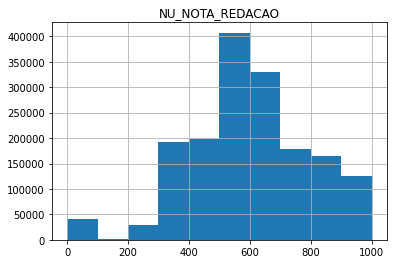

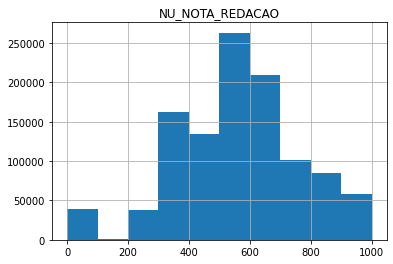

In [ ]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').hist()

Grouping the NU_NOTA_REDACAO (written test grade) by TP_SEXO (by sex) and getting all basic statistics

In [ ]:
microdatasEnemSexoRedacao.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             1663652.0  588.297913  196.467114  0.0  480.0  580.0  720.0   
M             1090488.0  550.703832  202.735245  0.0  420.0  560.0  680.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

## Questionnaires of socioeconomic indicators

Separating important columns

In [30]:
columnsSelected = ['NU_INSCRICAO',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO', 
       'Q001', 'Q002']

Filtering the selected microdatas

In [31]:
microdatasEnemSelected = microdatasEnem.filter(items=columnsSelected)

In [ ]:
microdatasEnemSelected.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,200006271946,NaN,NaN,NaN,NaN
1,200001195856,711.3,580.0,NaN,NaN
2,200001943954,NaN,NaN,B,C
3,200001908998,759.4,760.0,NaN,NaN
4,200001634757,NaN,NaN,B,G


Removing rows with NU_NOTA_REDACAO, NU_NOTA_MT, Q001 and Q002 with NaN values

In [32]:
microdatasEnemSelected = microdatasEnemSelected.dropna()

In [ ]:
microdatasEnemSelected.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
5,200003132410,526.7,700.0,C,B
8,200006762554,448.5,600.0,B,C
11,200006138472,546.5,640.0,B,C
18,200003343448,420.3,800.0,C,C
19,200005966328,405.6,500.0,C,D


Creating dictionary to Q001 and Q002 (father and mother education respectively)

In [33]:
q001e002Dictionary = {
    'A': 'Nunca estudou', 
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei.'
}

### Microdata grouping

Filtering and counting the questionnaire on father's education grouped education

In [ ]:
microdatasEnemSelected.filter(items=['Q001', 'NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,336216
B,1324198
C,839009
D,615284
E,1444832
F,382851
G,239720
H,505033


To remove pandas error

In [ ]:
pd.set_option('mode.chained_assignment', None)

Creating a new column to improve the analysis by the father's education responses

In [34]:
microdatasEnemSelected['NO_Q001'] = [q001e002Dictionary[response] for response in microdatasEnemSelected.Q001]

In [ ]:
microdatasEnemSelected.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
5,200003132410,526.7,700.0,C,B,"Completou a 4ª série/5º ano, mas não completou..."
8,200006762554,448.5,600.0,B,C,Não completou a 4ª série/5º ano do Ensino Fund...
11,200006138472,546.5,640.0,B,C,Não completou a 4ª série/5º ano do Ensino Fund...
18,200003343448,420.3,800.0,C,C,"Completou a 4ª série/5º ano, mas não completou..."
19,200005966328,405.6,500.0,C,D,"Completou a 4ª série/5º ano, mas não completou..."


Creating a new column to improve the analysis by the mother's education responses

In [35]:
microdatasEnemSelected['NO_Q002'] = [q001e002Dictionary[response] for response in microdatasEnemSelected.Q002]

In [36]:
microdatasEnemSelected.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
5,200003132410,526.7,700.0,C,B,"Completou a 4ª série/5º ano, mas não completou...",Não completou a 4ª série/5º ano do Ensino Fund...
8,200006762554,448.5,600.0,B,C,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou..."
11,200006138472,546.5,640.0,B,C,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou..."
18,200003343448,420.3,800.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."
19,200005966328,405.6,500.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...


#### Comparing the distribution of the father's and mother's level of education

Distribution of candidates by father's education

In [ ]:
microdatasEnemSelected.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",736397
Não completou a 4ª série/5º ano do Ensino Fundamental.,483323
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",352976
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",284175
"Completou a Faculdade, mas não completou a Pós-graduação.",233881
Não sei.,199727
Completou a Pós-graduação.,157039
Nunca estudou,113786


Distribution of candidates by mother's education

In [ ]:
microdatasEnemSelected.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",881498
Não completou a 4ª série/5º ano do Ensino Fundamental.,358276
"Completou a Faculdade, mas não completou a Pós-graduação.",312436
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",306430
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",294949
Completou a Pós-graduação.,275108
Nunca estudou,76337
Não sei.,56270


Mathematics performance by father's education

In [ ]:
mean_grade_math_by_education_father = microdatasEnemSelected.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)

In [ ]:
mean_grade_math_by_education_father

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação.,620.382538
"Completou a Faculdade, mas não completou a Pós-graduação.",598.426301
"Completou o Ensino Médio, mas não completou a Faculdade.",534.797631
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",511.877629
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",499.029500
Não sei.,490.961933
Não completou a 4ª série/5º ano do Ensino Fundamental.,478.183048
Nunca estudou,455.340086


Plotting mathematics performance by father's education

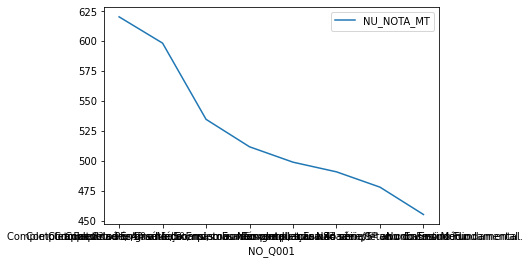

In [ ]:
mean_grade_math_by_education_father.plot()

Mathematics performance by mother's education

In [ ]:
mean_grade_math_by_education_mother = microdatasEnemSelected.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)

In [ ]:
mean_grade_math_by_education_mother

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação.,594.897645
"Completou a Faculdade, mas não completou a Pós-graduação.",580.438367
"Completou o Ensino Médio, mas não completou a Faculdade.",523.880757
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",499.628369
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",488.812625
Não sei.,478.135403
Não completou a 4ª série/5º ano do Ensino Fundamental.,470.848168
Nunca estudou,448.565889


Plotting mathematics performance by mother's education

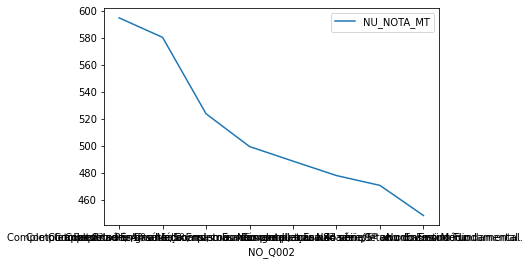

In [ ]:
mean_grade_math_by_education_mother.plot()

Redaction performance by father's education

In [ ]:
mean_grade_redaction_by_education_father = microdatasEnemSelected.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [ ]:
mean_grade_redaction_by_education_father

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação.,703.820707
"Completou a Faculdade, mas não completou a Pós-graduação.",676.863448
"Completou o Ensino Médio, mas não completou a Faculdade.",604.508709
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",575.299446
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",555.248572
Não sei.,539.446545
Não completou a 4ª série/5º ano do Ensino Fundamental.,523.368844
Nunca estudou,486.152602


Plotting redaction performance by father's education

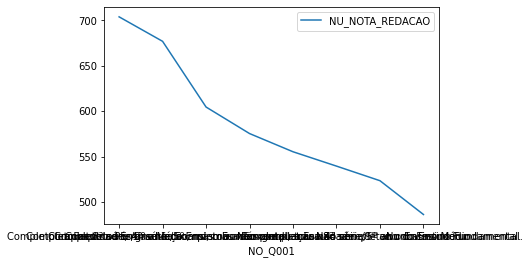

In [ ]:
mean_grade_redaction_by_education_father.plot()

Redaction performance by mother's education

In [ ]:
mean_grade_redaction_by_education_mother = microdatasEnemSelected.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [ ]:
mean_grade_redaction_by_education_mother

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,679.137793
"Completou a Faculdade, mas não completou a Pós-graduação.",657.117362
"Completou o Ensino Médio, mas não completou a Faculdade.",590.947841
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",557.553814
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",538.449630
Não completou a 4ª série/5º ano do Ensino Fundamental.,510.052194
Não sei.,505.353830
Nunca estudou,468.926733


Plotting redaction performance by mother's education

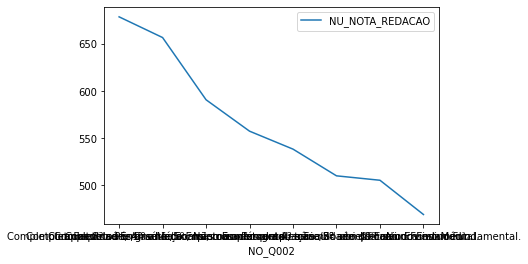

In [ ]:
mean_grade_redaction_by_education_mother.plot()

Adding new column SG_UF_PROVA (state where the test took place)

In [37]:
microdatasEnemSelected['SG_UF_PROVA'] = microdatasEnem.SG_UF_PROVA

In [38]:
microdatasEnemSelected.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002,SG_UF_PROVA
5,200003132410,526.7,700.0,C,B,"Completou a 4ª série/5º ano, mas não completou...",Não completou a 4ª série/5º ano do Ensino Fund...,RS
8,200006762554,448.5,600.0,B,C,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou...",PB
11,200006138472,546.5,640.0,B,C,Não completou a 4ª série/5º ano do Ensino Fund...,"Completou a 4ª série/5º ano, mas não completou...",BA
18,200003343448,420.3,800.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou...",AL
19,200005966328,405.6,500.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...,PA


Redaction performance by mother's education in the state Rio Grande do Norte

In [53]:
mean_grade_redaction_by_education_mother_in_RN = microdatasEnemSelected.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
                                                                  .where(microdatasEnemSelected.SG_UF_PROVA == 'RN')\
                                                                  .groupby('NO_Q002')\
                                                                  .mean()\
                                                                  .sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [54]:
mean_grade_redaction_by_education_mother_in_RN

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,695.456035
"Completou a Faculdade, mas não completou a Pós-graduação.",667.128803
"Completou o Ensino Médio, mas não completou a Faculdade.",599.935300
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",566.376247
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",546.937693
Não completou a 4ª série/5º ano do Ensino Fundamental.,520.424573
Não sei.,509.332162
Nunca estudou,485.451491


Redaction performance by mother's education in all states

In [61]:
mean_grade_redaction_by_education_mother_in_each_state = microdatasEnemSelected.filter(items=['SG_UF_PROVA', 'NU_NOTA_REDACAO', 'NO_Q002'])\
                                                                  .groupby(['SG_UF_PROVA', 'NO_Q002'])\
                                                                  .mean()

In [62]:
mean_grade_redaction_by_education_mother_in_each_state

NU_NOTA_REDACAO
SG_UF_PROVA NO_Q002                                                            
AC          Completou a 4ª série/5º ano, mas não completou ...       514.239829
            Completou a 8ª série/9º ano do Ensino Fundament...       530.526906
            Completou a Faculdade, mas não completou a Pós-...       593.969144
            Completou a Pós-graduação.                               619.370409
            Completou o Ensino Médio, mas não completou a F...       546.508055
...                                                                         ...
TO          Completou a Pós-graduação.                               631.313378
            Completou o Ensino Médio, mas não completou a F...       547.671422
            Nunca estudou                                            432.592593
            Não completou a 4ª série/5º ano do Ensino Funda...       476.690341
            Não sei.                                                 479.896194

[216 rows x 1 columns]

Importing pyplot matplotlib

In [57]:
import matplotlib.pyplot as plt

Plotting the redaction performance by mother's education in all state

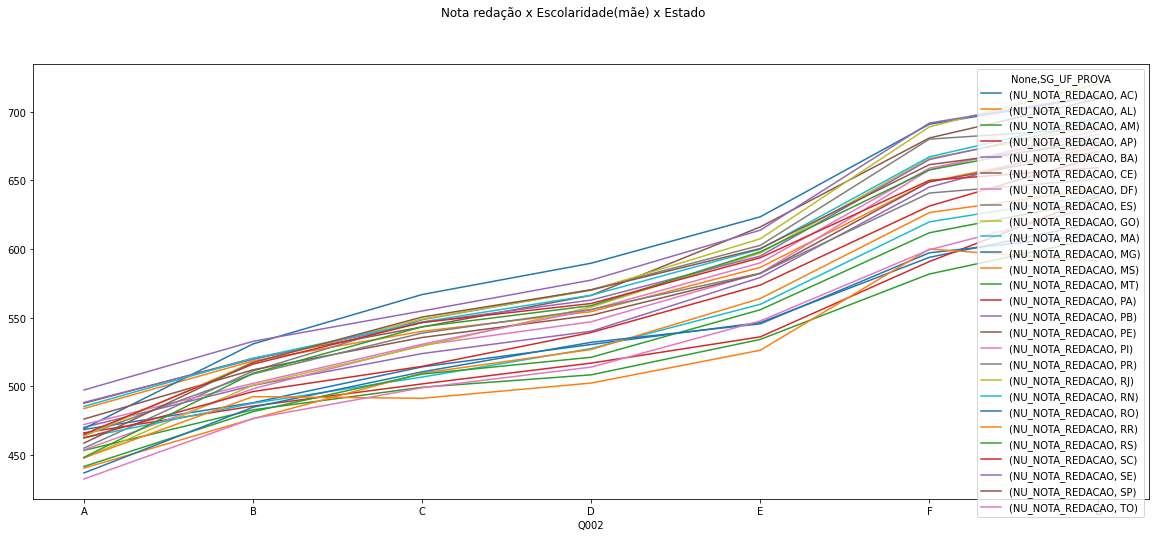

In [74]:
fig, ax = plt.subplots(figsize=(20,8))
plt.suptitle('Nota redação x Escolaridade(mãe) x Estado')

microdatasEnemSelected.filter(items=['SG_UF_PROVA', 'NU_NOTA_REDACAO', 'Q002'])\
                                                                  .where(microdatasEnemSelected.Q002 != 'H')\
                                                                  .groupby(['Q002', 'SG_UF_PROVA'])\
                                                                  .mean()\
                                                                  .sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                                                                  .unstack().plot(ax=ax, )

#### Comparing the socioeconomic indicators about grades in natural sciences grouped by school completion status

In [4]:
columnsSelected = ['NU_INSCRICAO', 'NU_NOTA_CN', 'TP_ST_CONCLUSAO']

In [5]:
microdatasEnemSelected = microdatasEnem.filter(items=columnsSelected)

In [ ]:
microdatasEnemSelected.head()

,NU_INSCRICAO,NU_NOTA_CN,TP_ST_CONCLUSAO
0,200006271946,NaN,1
1,200001195856,604.1,1
2,200001943954,NaN,2
3,200001908998,620.8,2
4,200001634757,NaN,1


In [6]:
situationConclusionDictionary = {
    1: 'Já concluí o Ensino Médio', 
    2: 'Estou cursando e concluirei o Ensino Médio em 2020',
    3: 'Estou cursando e concluirei o Ensino Médio após 2020',
    4: 'Não concluí e não estou cursando o Ensino Médio'
}

In [7]:
microdatasEnemSelected = microdatasEnemSelected.dropna()

In [ ]:
microdatasEnemSelected.head()

,NU_INSCRICAO,NU_NOTA_CN,TP_ST_CONCLUSAO
1,200001195856,604.1,1
3,200001908998,620.8,2
5,200003132410,498.1,1
7,200001334237,604.6,1
8,200006762554,439.7,1


In [ ]:
microdatasEnemSelected.filter(items=['TP_ST_CONCLUSAO', 'NU_INSCRICAO']).groupby('TP_ST_CONCLUSAO').count()

,NU_INSCRICAO
TP_ST_CONCLUSAO,
1,1425466
2,815867
3,349015
4,7092


In [ ]:
pd.set_option('mode.chained_assignment', None)

In [8]:
microdatasEnemSelected['NO_ST_CONCLUSAO'] = [situationConclusionDictionary[response] for response in microdatasEnemSelected.TP_ST_CONCLUSAO]

In [ ]:
microdatasEnemSelected.head()

,NU_INSCRICAO,NU_NOTA_CN,TP_ST_CONCLUSAO,NO_ST_CONCLUSAO
1,200001195856,604.1,1,Já concluí o Ensino Médio
3,200001908998,620.8,2,Estou cursando e concluirei o Ensino Médio em ...
5,200003132410,498.1,1,Já concluí o Ensino Médio
7,200001334237,604.6,1,Já concluí o Ensino Médio
8,200006762554,439.7,1,Já concluí o Ensino Médio


In [28]:
microdatasEnemCNSTConclusao = microdatasEnemSelected.filter(items=['NO_ST_CONCLUSAO', 'NU_NOTA_CN']).groupby('NO_ST_CONCLUSAO').mean().sort_values(by='NU_NOTA_CN', ascending=False)

In [29]:
microdatasEnemCNSTConclusao

,NU_NOTA_CN
NO_ST_CONCLUSAO,
Já concluí o Ensino Médio,492.295472
Estou cursando e concluirei o Ensino Médio em 2020,488.466619
Estou cursando e concluirei o Ensino Médio após 2020,487.936838
Não concluí e não estou cursando o Ensino Médio,456.639044


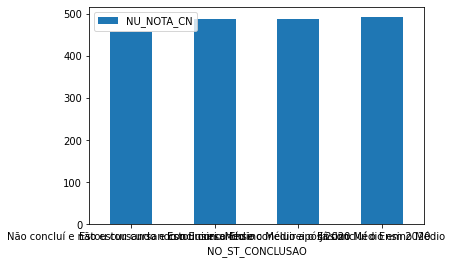

In [19]:
microdatasEnemCNSTConclusao.plot.bar(rot=0)